In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df_path="/content/drive/MyDrive/abp_accel.csv"

In [129]:
df=pd.read_csv(df_path)

In [130]:
df.head(20)

,timestamp,x,y,z
0,2015-06-12 13:30:00.161041,100,620,804
1,2015-06-12 13:30:00.260490,68,640,800
2,2015-06-12 13:30:00.359939,48,628,884
3,2015-06-12 13:30:00.459388,44,616,888
4,2015-06-12 13:30:00.558837,76,628,860
5,2015-06-12 13:30:00.658286,104,616,868
6,2015-06-12 13:30:00.757735,120,596,868
7,2015-06-12 13:30:00.857184,136,612,812
8,2015-06-12 13:30:00.956633,164,624,840
9,2015-06-12 13:30:01.056082,168,596,840


In [131]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')

In [132]:
df.sort_values(by='timestamp',ascending=True,inplace=True)

In [133]:
df=df.set_index('timestamp')

In [134]:
df.head()

,x,y,z
timestamp,,,
2015-06-12 13:30:00.161041,100,620,804
2015-06-12 13:30:00.260490,68,640,800
2015-06-12 13:30:00.359939,48,628,884
2015-06-12 13:30:00.459388,44,616,888
2015-06-12 13:30:00.558837,76,628,860


#Resampling data based on Seconds,Minute,Hour,Daily

In [135]:
df_second=df.resample('3S').mean()#Taking the sample data of 10 seconds

In [136]:
df_second.head()

,x,y,z
timestamp,,,
2015-06-12 13:30:00,136.000000,610.344828,844.689655
2015-06-12 13:30:03,-88.400000,579.066667,843.200000
2015-06-12 13:30:06,-684.400000,412.000000,662.000000
2015-06-12 13:30:09,-795.741935,343.870968,562.838710
2015-06-12 13:30:12,-724.933333,390.800000,621.333333


#Will Vizualize the data of 24 hours

In [137]:
st_date=pd.to_datetime('2015-06-12 00:00:00')

In [138]:
end_date=pd.to_datetime('2015-06-13 00:00:00')

In [139]:
df_24_hrs=df_second[(df_second.index >= st_date) & (df_second.index <= end_date)]

In [140]:
df_24_hrs

,x,y,z
timestamp,,,
2015-06-12 13:30:00,136.000000,610.344828,844.689655
2015-06-12 13:30:03,-88.400000,579.066667,843.200000
2015-06-12 13:30:06,-684.400000,412.000000,662.000000
2015-06-12 13:30:09,-795.741935,343.870968,562.838710
2015-06-12 13:30:12,-724.933333,390.800000,621.333333
...,...,...,...
2015-06-12 23:59:48,378.266667,759.733333,631.333333
2015-06-12 23:59:51,406.000000,762.266667,611.600000
2015-06-12 23:59:54,418.133333,752.800000,611.466667


In [141]:
#Finding the acceleration
df_24_hrs['Acceleration']=np.sqrt(df_24_hrs['x']**2+df_24_hrs['y']**2+df_24_hrs['z']**2)

<ipython-input-141-e5c23c71143f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24_hrs['Acceleration']=np.sqrt(df_24_hrs['x']**2+df_24_hrs['y']**2+df_24_hrs['z']**2)


In [142]:
df_24_hrs

,x,y,z,Acceleration
timestamp,,,,
2015-06-12 13:30:00,136.000000,610.344828,844.689655,1050.960238
2015-06-12 13:30:03,-88.400000,579.066667,843.200000,1026.702978
2015-06-12 13:30:06,-684.400000,412.000000,662.000000,1037.492824
2015-06-12 13:30:09,-795.741935,343.870968,562.838710,1033.556909
2015-06-12 13:30:12,-724.933333,390.800000,621.333333,1031.653086
...,...,...,...,...
2015-06-12 23:59:48,378.266667,759.733333,631.333333,1057.762822
2015-06-12 23:59:51,406.000000,762.266667,611.600000,1058.272664
2015-06-12 23:59:54,418.133333,752.800000,611.466667,1056.141472


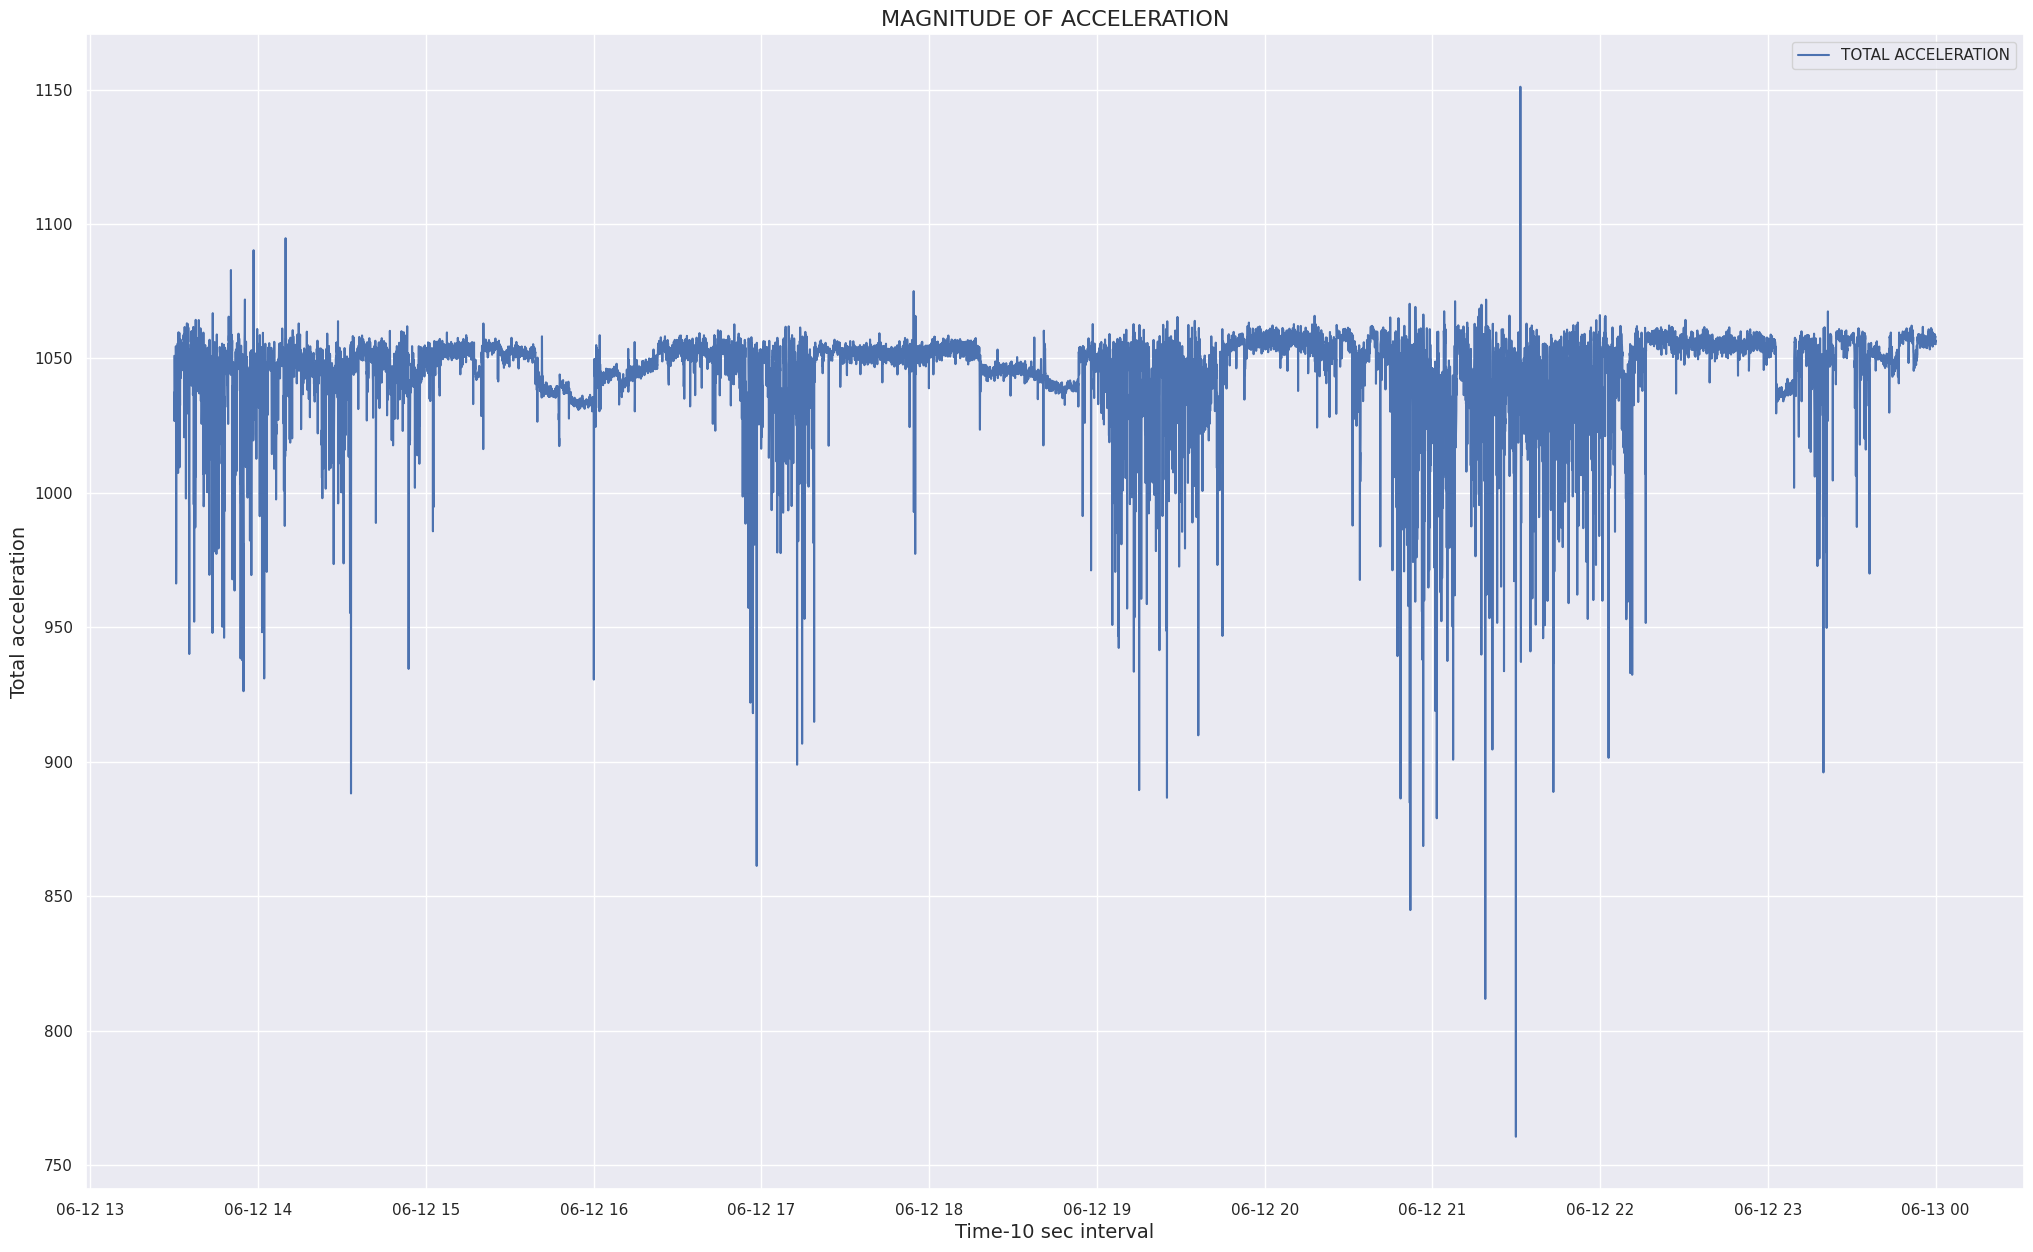

In [143]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,15))
sns.lineplot(data=df_24_hrs,x="timestamp",y="Acceleration",color='b',label='TOTAL ACCELERATION')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('Total acceleration', fontsize=14)
plt.title('MAGNITUDE OF ACCELERATION', fontsize=16)
plt.legend()
plt.show()

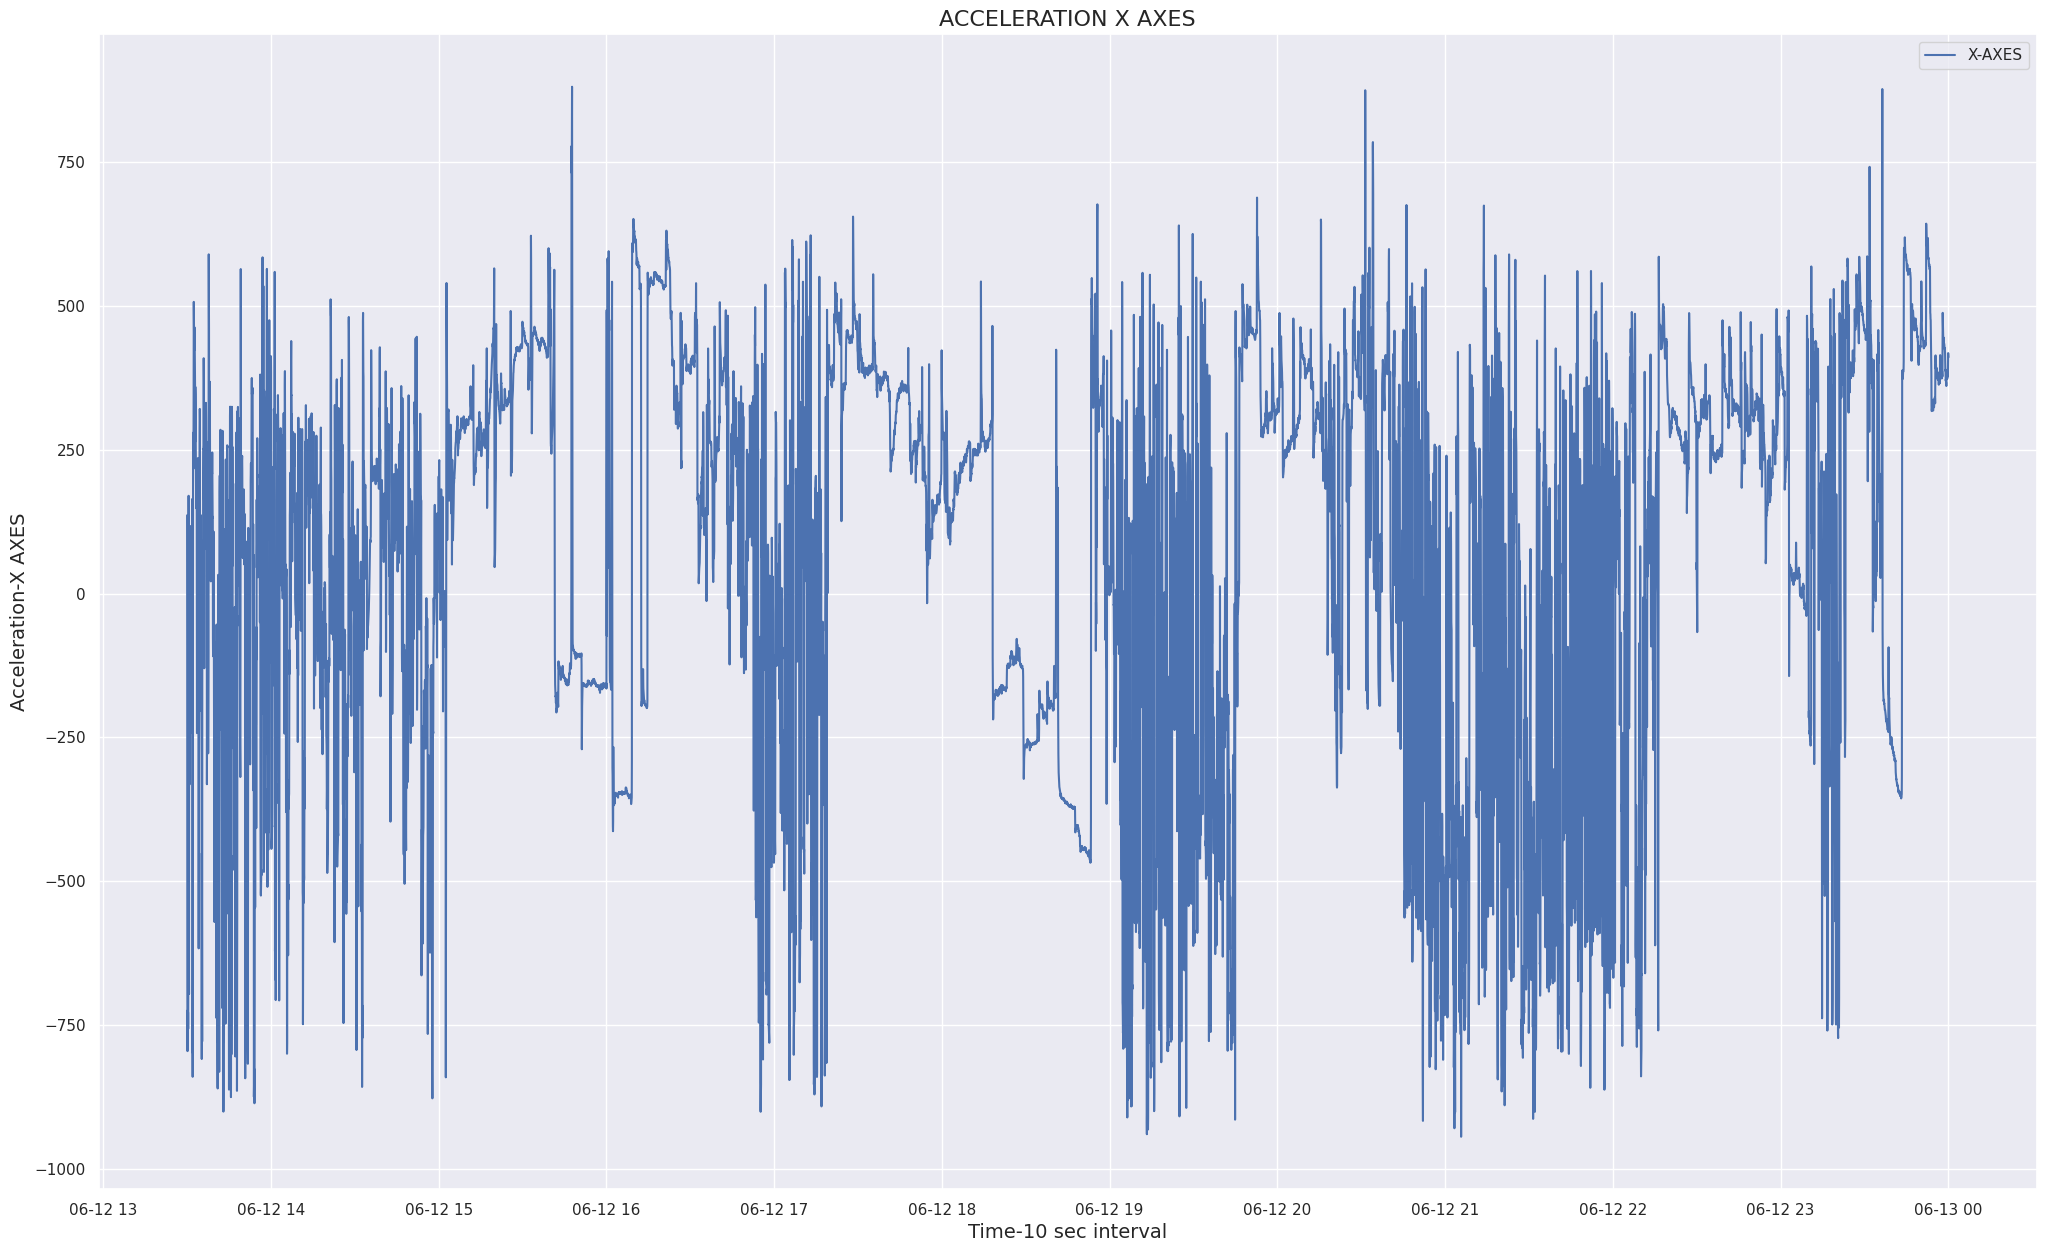

In [144]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,15))
sns.lineplot(data=df_24_hrs,x="timestamp",y="x",color='b',label='X-AXES')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('Acceleration-X AXES', fontsize=14)
plt.title('ACCELERATION X AXES', fontsize=16)
plt.legend()
plt.show()

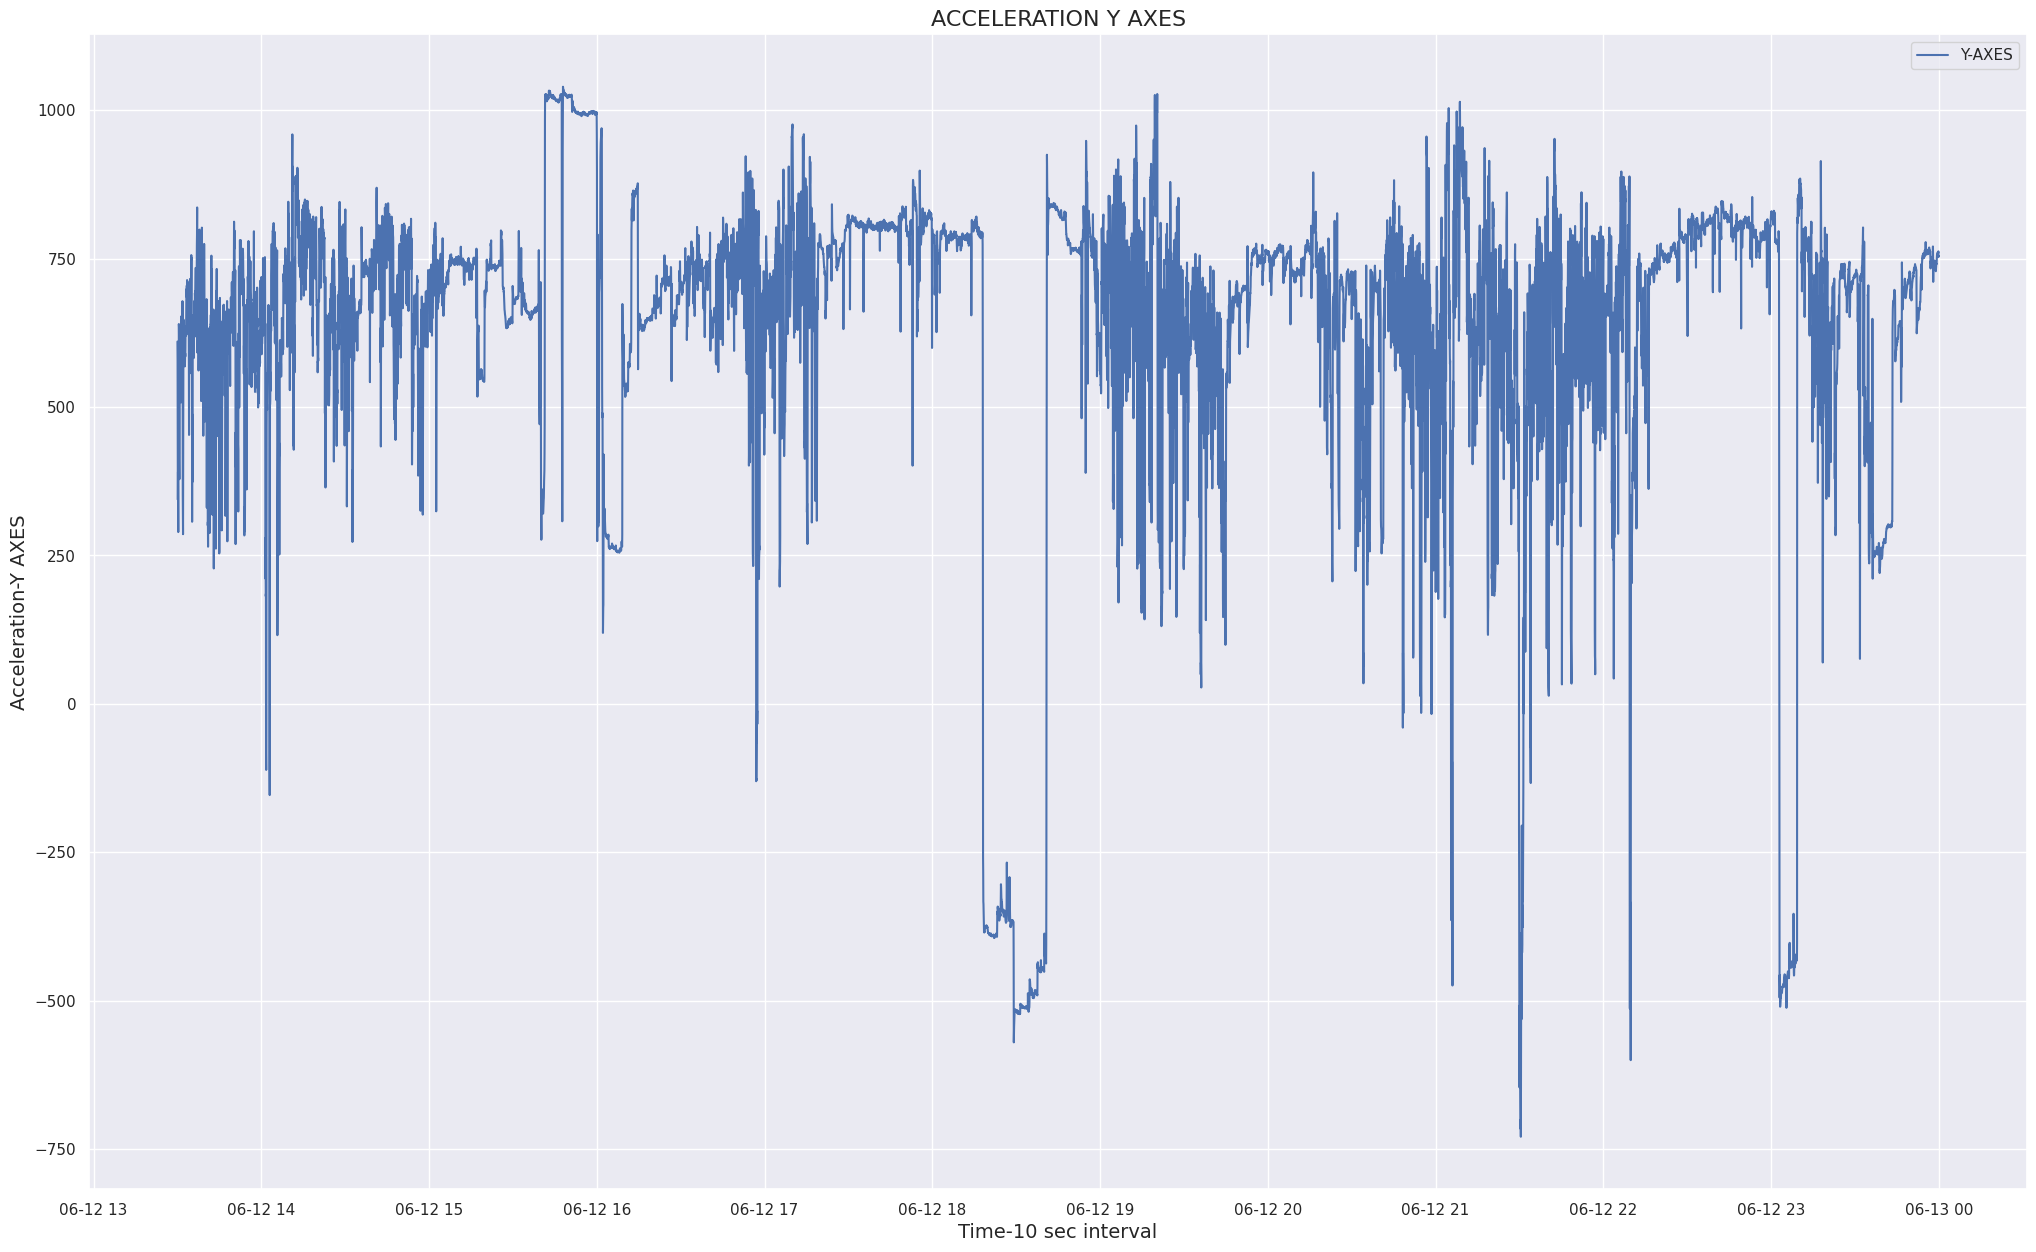

In [145]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,15))
sns.lineplot(data=df_24_hrs,x="timestamp",y="y",color='b',label='Y-AXES')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('Acceleration-Y AXES', fontsize=14)
plt.title('ACCELERATION Y AXES', fontsize=16)
plt.legend()
plt.show()

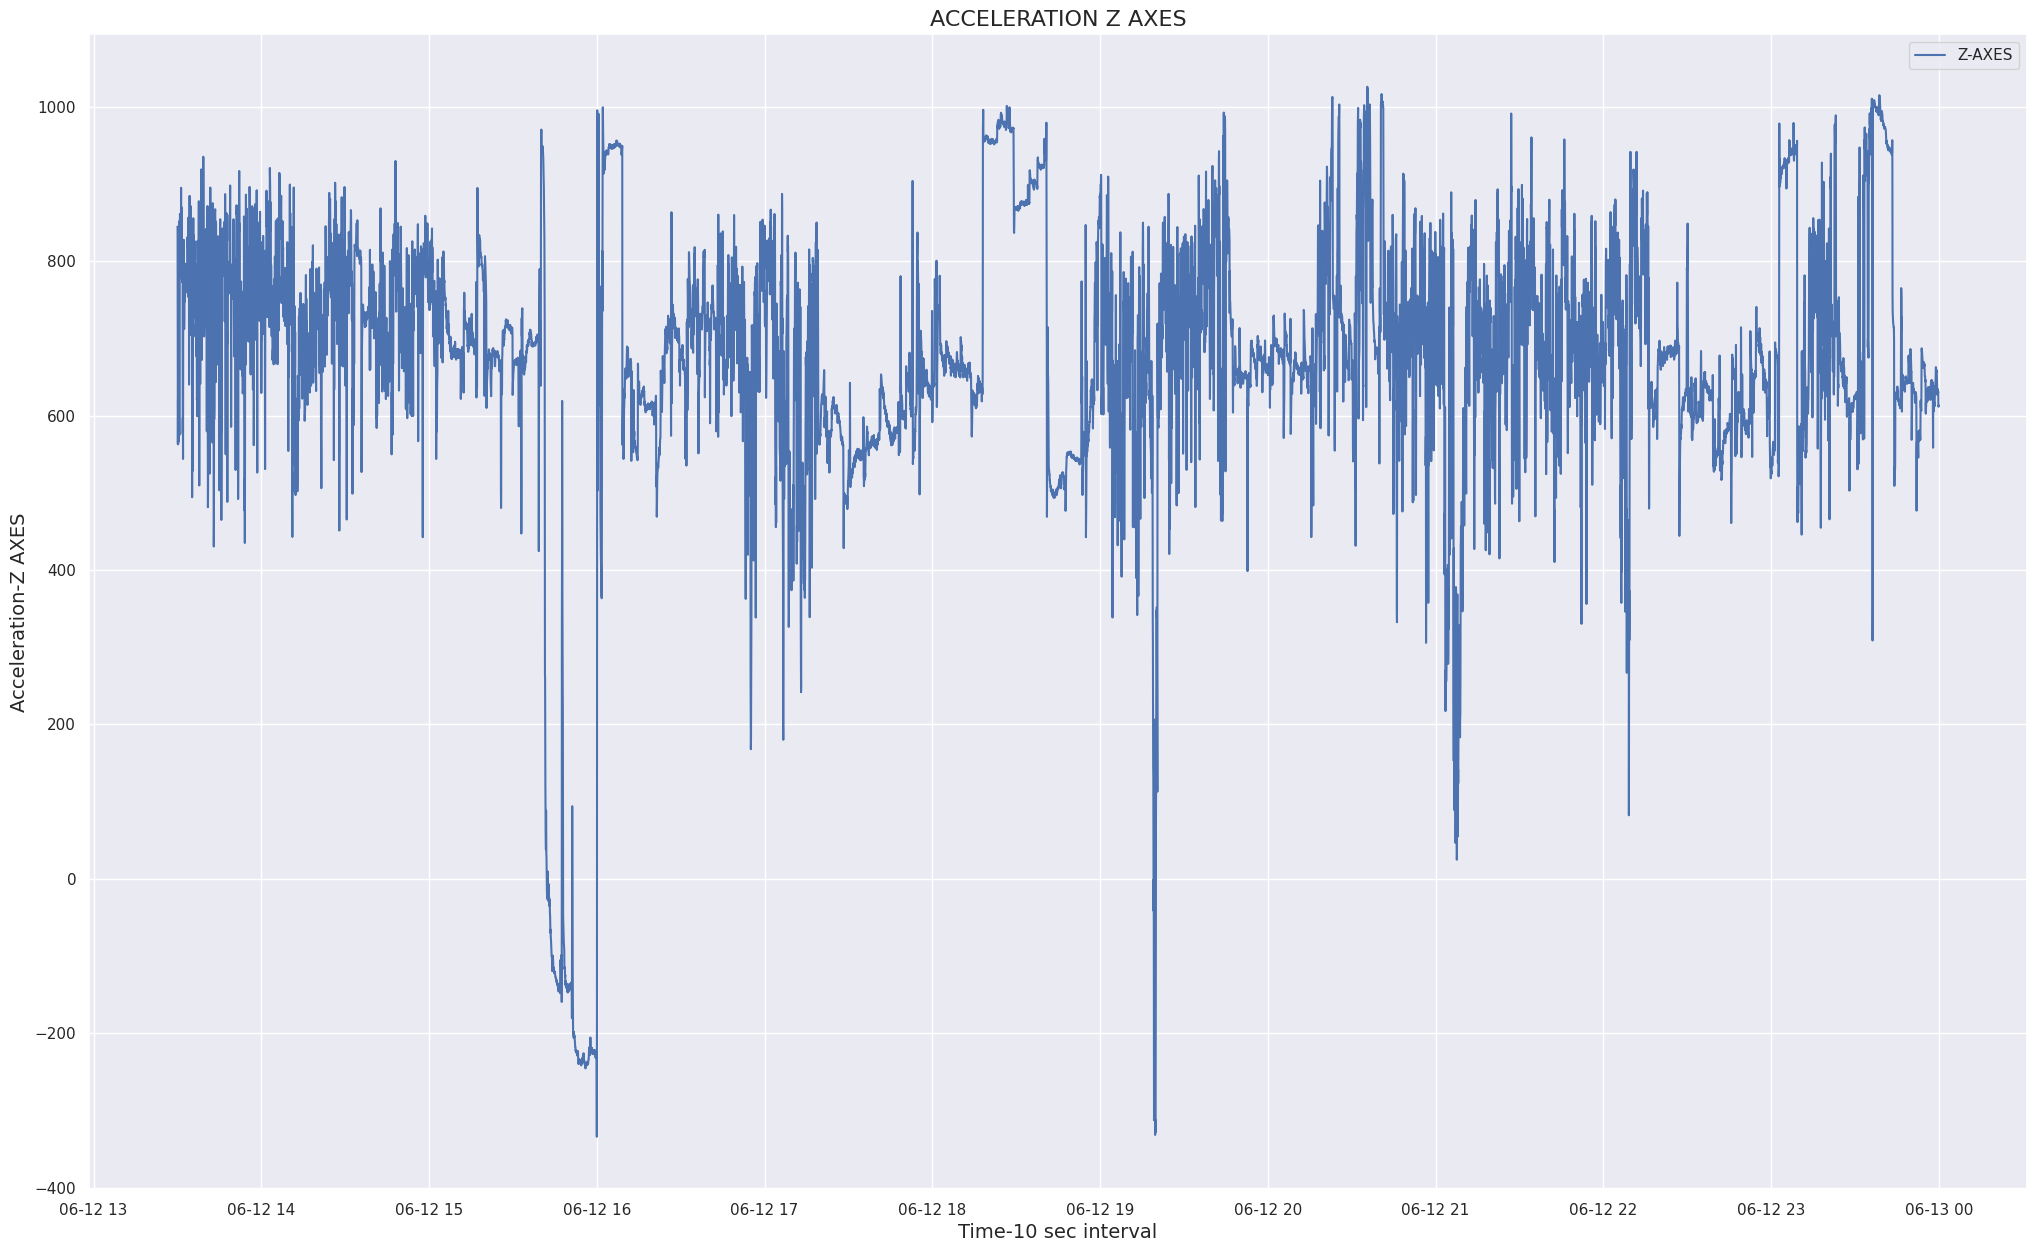

In [146]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,15))
sns.lineplot(data=df_24_hrs,x="timestamp",y="z",color='b',label='Z-AXES')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('Acceleration-Z AXES', fontsize=14)
plt.title('ACCELERATION Z AXES', fontsize=16)
plt.legend()
plt.show()

In [147]:
st_time_1=pd.to_datetime('2015-06-12 13:30:00')

In [148]:
end_time_1=pd.to_datetime('2015-06-12 17:30:00')

In [149]:
df_1st_qtr=df_second[(df_second.index >= st_time_1) & (df_second.index <= end_time_1)]

In [150]:
df_1st_qtr

,x,y,z
timestamp,,,
2015-06-12 13:30:00,136.000000,610.344828,844.689655
2015-06-12 13:30:03,-88.400000,579.066667,843.200000
2015-06-12 13:30:06,-684.400000,412.000000,662.000000
2015-06-12 13:30:09,-795.741935,343.870968,562.838710
2015-06-12 13:30:12,-724.933333,390.800000,621.333333
...,...,...,...
2015-06-12 17:29:48,422.533333,818.133333,508.666667
2015-06-12 17:29:51,422.400000,814.266667,515.466667
2015-06-12 17:29:54,416.516129,819.225806,512.129032


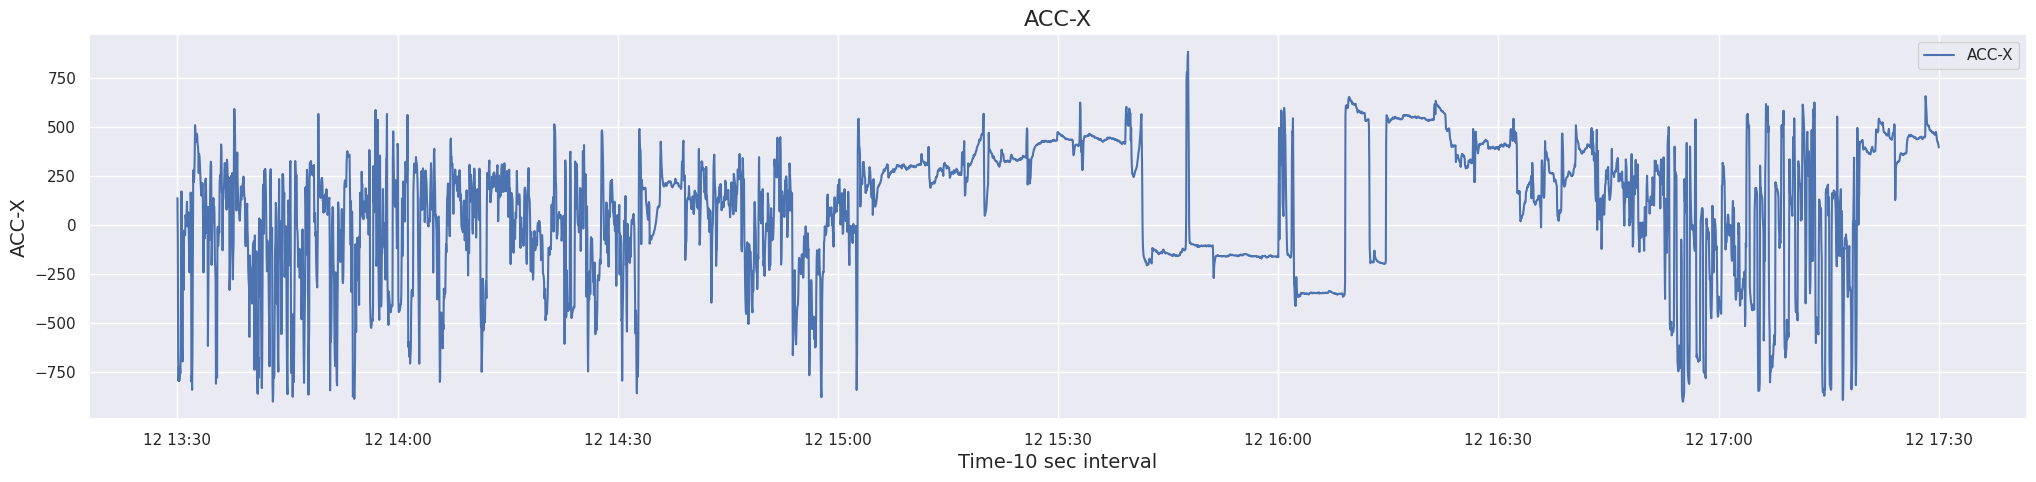

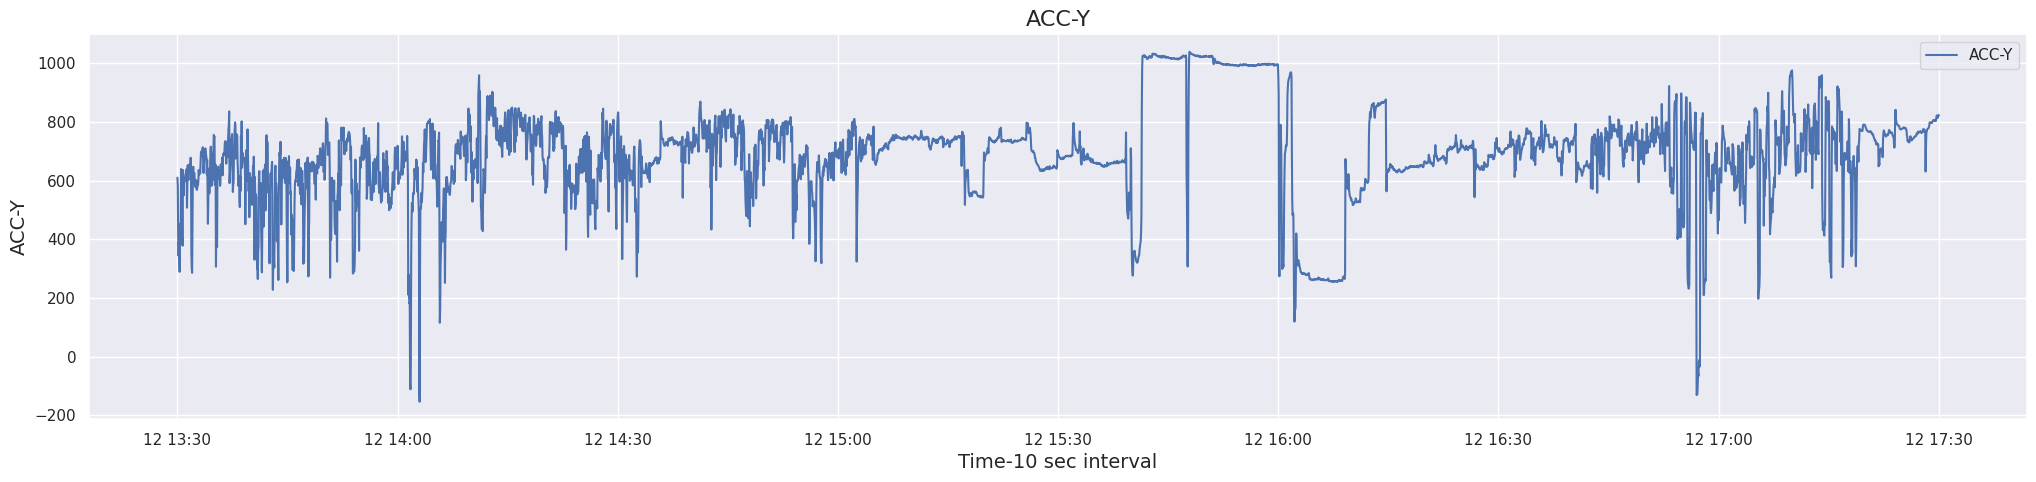

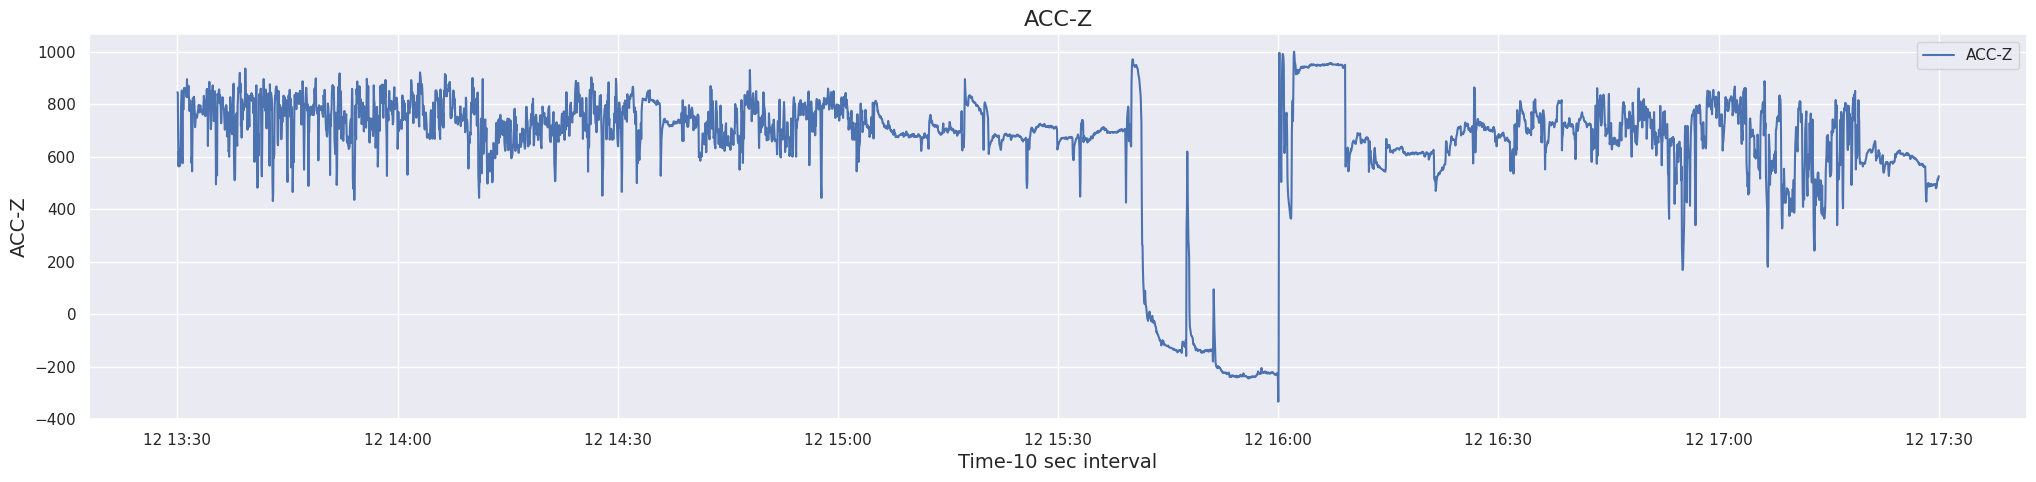

In [151]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_1st_qtr,x="timestamp",y="x",color='b',label='ACC-X')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('ACC-X', fontsize=14)
plt.title('ACC-X', fontsize=16)
plt.legend()
plt.show()


sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_1st_qtr,x="timestamp",y="y",color='b',label='ACC-Y')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('ACC-Y', fontsize=14)
plt.title('ACC-Y', fontsize=16)
plt.legend()
plt.show()


sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_1st_qtr,x="timestamp",y="z",color='b',label='ACC-Z')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('ACC-Z', fontsize=14)
plt.title('ACC-Z', fontsize=16)
plt.legend()
plt.show()

In [152]:
st_time_2=pd.to_datetime('2015-06-12 17:30:00')

In [153]:
end_time_2=pd.to_datetime('2015-06-12 21:30:00')

In [154]:
df_2ndtr=df_second[(df_second.index >= st_time_2) & (df_second.index <= end_time_2)]

In [155]:
df_2ndtr

,x,y,z
timestamp,,,
2015-06-12 17:30:00,393.733333,824.000000,525.466667
2015-06-12 17:30:03,395.733333,822.000000,529.733333
2015-06-12 17:30:06,395.066667,817.200000,535.866667
2015-06-12 17:30:09,389.333333,809.333333,554.933333
2015-06-12 17:30:12,395.612903,802.193548,552.774194
...,...,...,...
2015-06-12 21:29:48,-574.666667,501.200000,701.200000
2015-06-12 21:29:51,-327.466667,-208.933333,653.866667
2015-06-12 21:29:54,-764.000000,-294.533333,581.200000


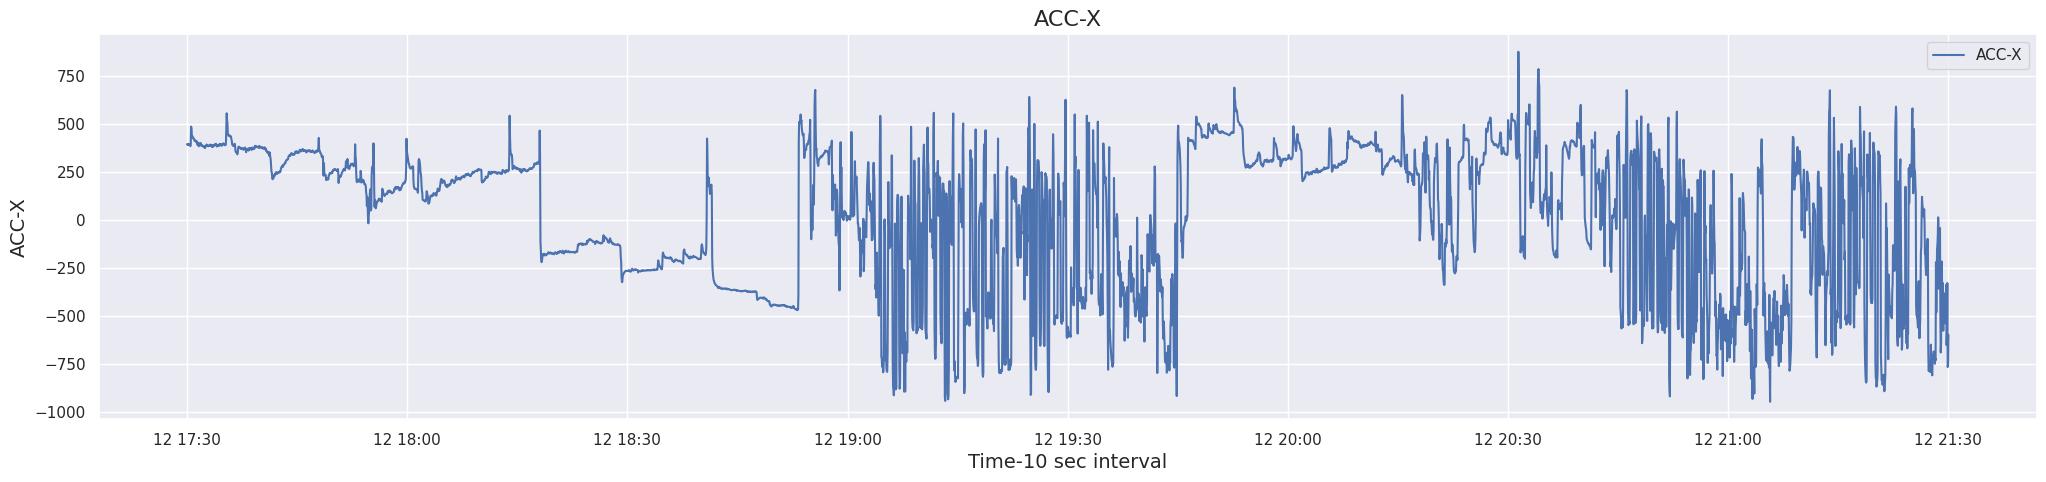

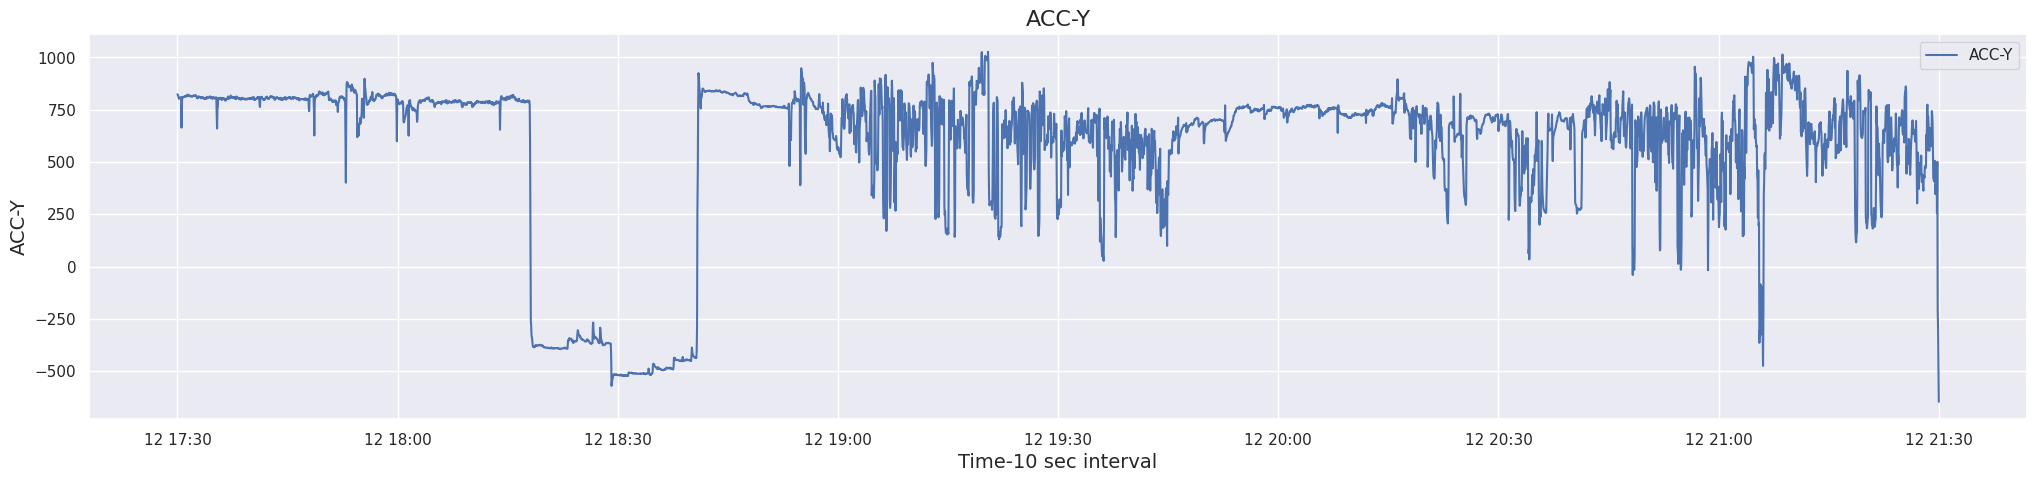

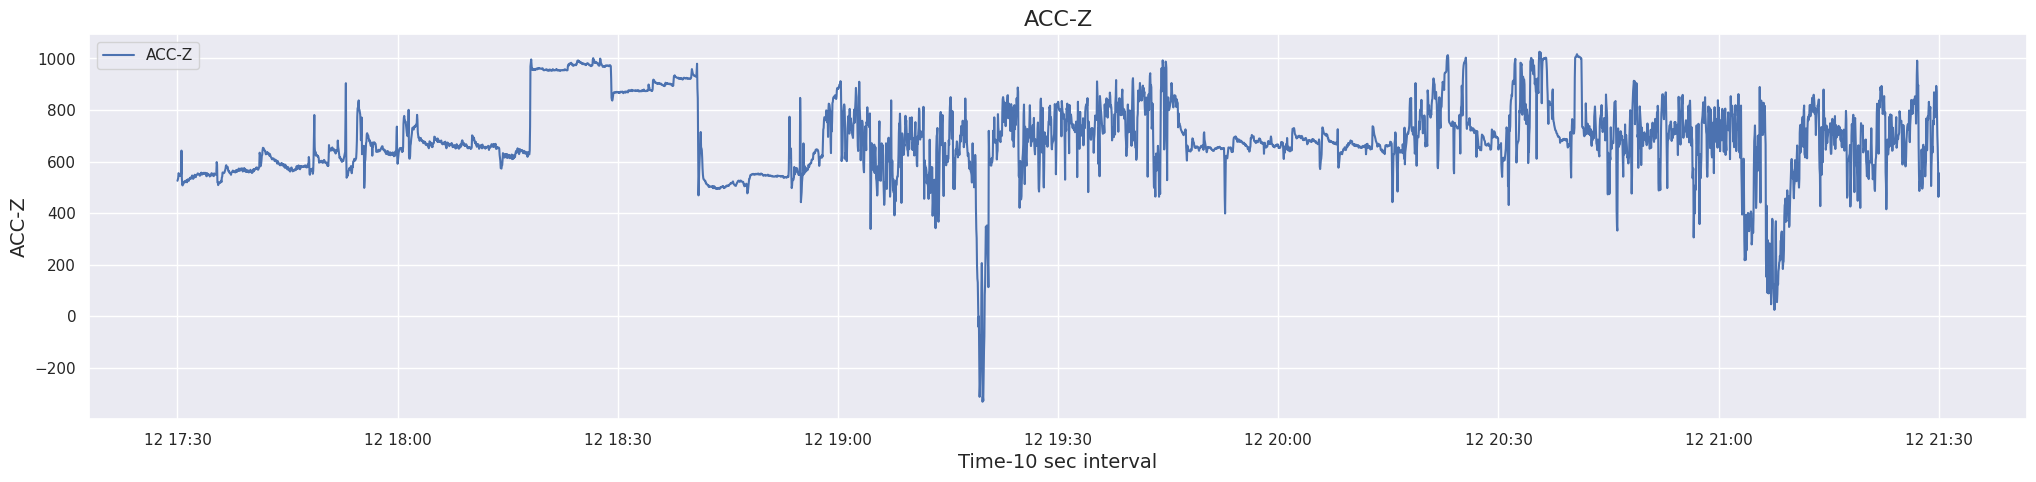

In [156]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_2ndtr,x="timestamp",y="x",color='b',label='ACC-X')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('ACC-X', fontsize=14)
plt.title('ACC-X', fontsize=16)
plt.legend()
plt.show()


sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_2ndtr,x="timestamp",y="y",color='b',label='ACC-Y')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('ACC-Y', fontsize=14)
plt.title('ACC-Y', fontsize=16)
plt.legend()
plt.show()


sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_2ndtr,x="timestamp",y="z",color='b',label='ACC-Z')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('ACC-Z', fontsize=14)
plt.title('ACC-Z', fontsize=16)
plt.legend()
plt.show()

In [157]:
st_time_3=pd.to_datetime('2015-06-12 21:30:00')

In [158]:
end_time_3=pd.to_datetime('2015-06-13 1:30:00')

In [159]:
df_3rd_qtr=df_second[(df_second.index >= st_time_3) & (df_second.index <= end_time_3)]

In [160]:
df_3rd_qtr

,x,y,z
timestamp,,,
2015-06-12 21:30:00,-596.666667,-645.866667,554.933333
2015-06-12 21:30:03,-443.733333,-508.266667,807.466667
2015-06-12 21:30:06,-408.266667,-543.866667,802.800000
2015-06-12 21:30:09,-397.333333,-566.133333,790.800000
2015-06-12 21:30:12,-324.533333,-609.066667,792.133333
...,...,...,...
2015-06-13 01:29:48,228.400000,784.133333,662.400000
2015-06-13 01:29:51,236.666667,786.000000,659.200000
2015-06-13 01:29:54,254.933333,788.400000,647.066667


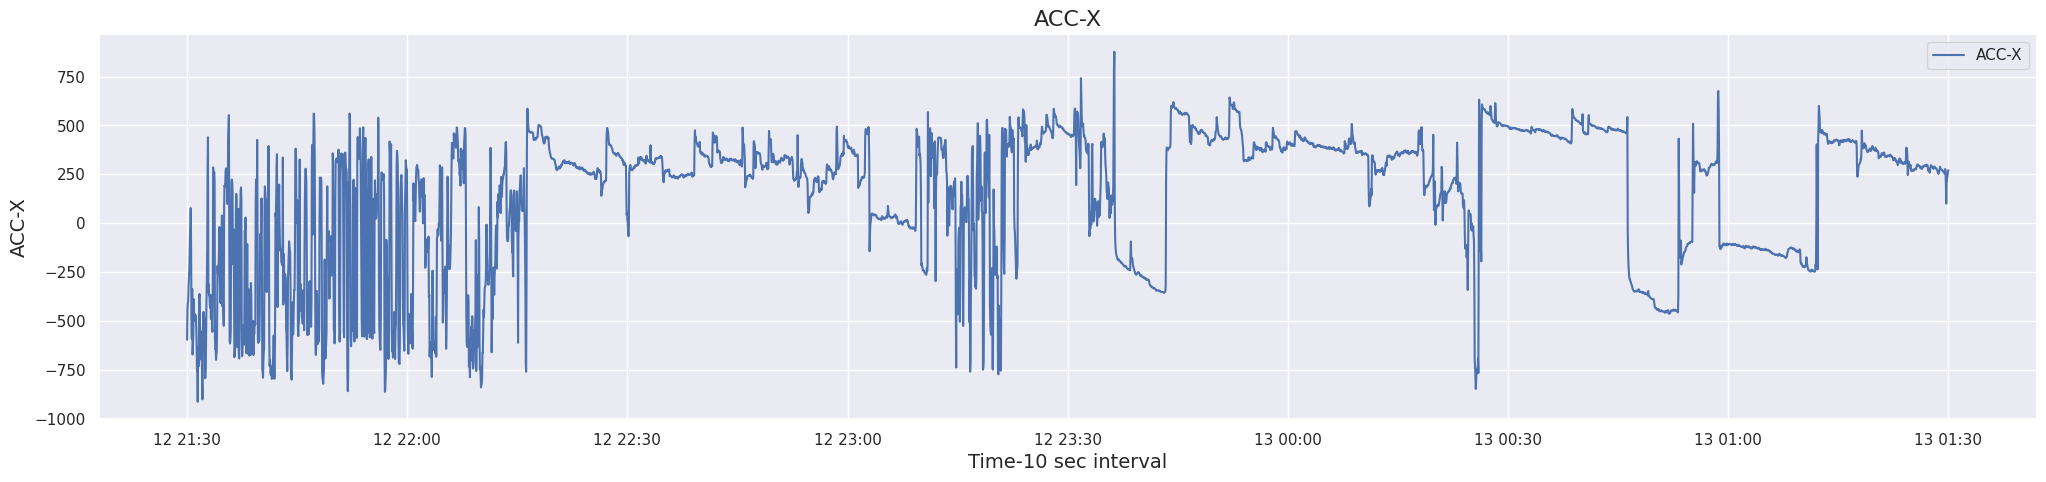

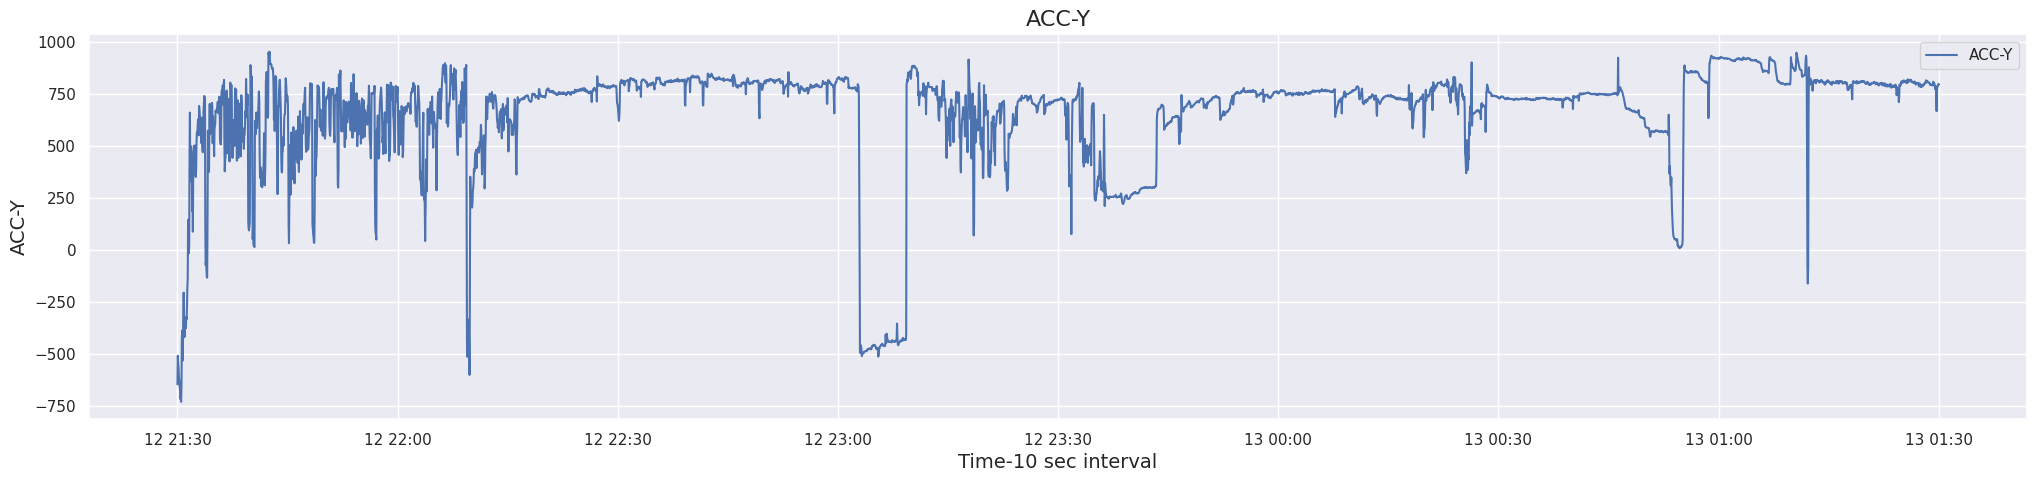

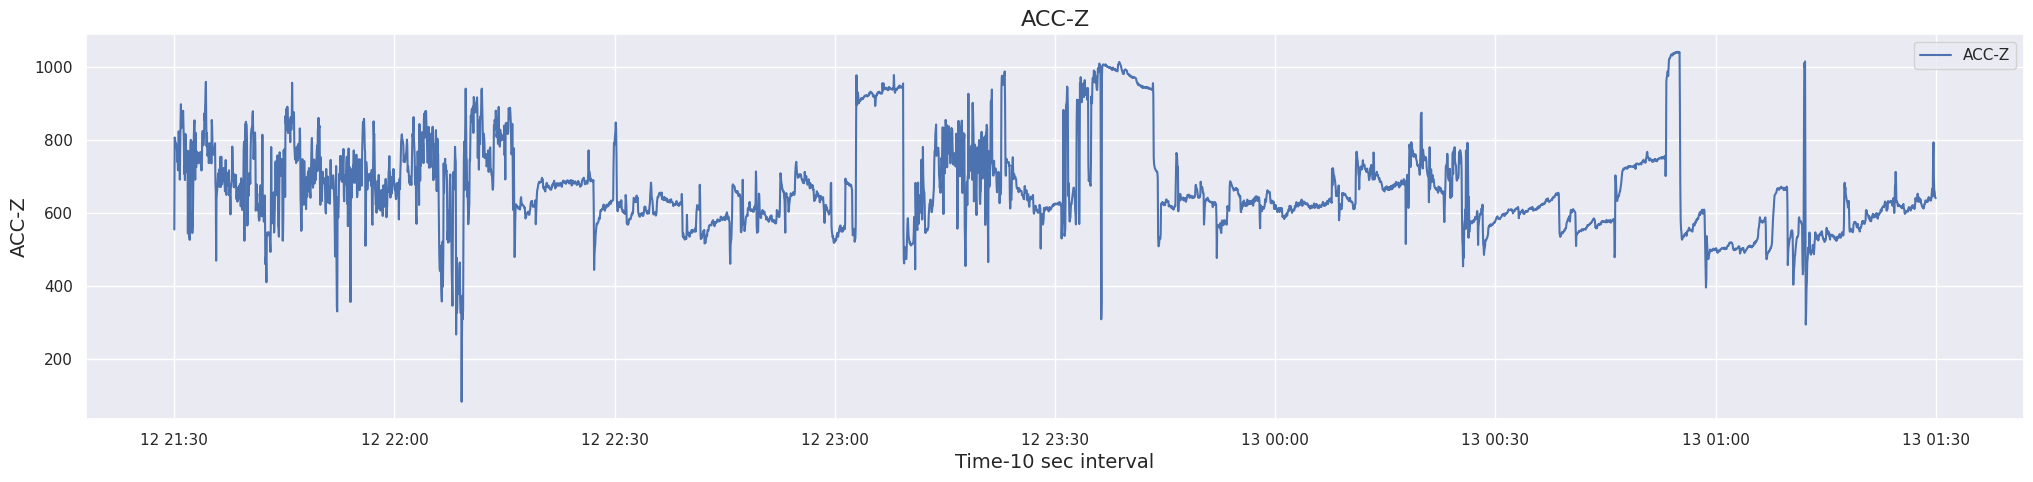

In [161]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_3rd_qtr,x="timestamp",y="x",color='b',label='ACC-X')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('ACC-X', fontsize=14)
plt.title('ACC-X', fontsize=16)
plt.legend()
plt.show()


sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_3rd_qtr,x="timestamp",y="y",color='b',label='ACC-Y')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('ACC-Y', fontsize=14)
plt.title('ACC-Y', fontsize=16)
plt.legend()
plt.show()


sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_3rd_qtr,x="timestamp",y="z",color='b',label='ACC-Z')
plt.xlabel('Time-10 sec interval', fontsize=14)
plt.ylabel('ACC-Z', fontsize=14)
plt.title('ACC-Z', fontsize=16)
plt.legend()
plt.show()

In [162]:
df_24_hrs

,x,y,z,Acceleration
timestamp,,,,
2015-06-12 13:30:00,136.000000,610.344828,844.689655,1050.960238
2015-06-12 13:30:03,-88.400000,579.066667,843.200000,1026.702978
2015-06-12 13:30:06,-684.400000,412.000000,662.000000,1037.492824
2015-06-12 13:30:09,-795.741935,343.870968,562.838710,1033.556909
2015-06-12 13:30:12,-724.933333,390.800000,621.333333,1031.653086
...,...,...,...,...
2015-06-12 23:59:48,378.266667,759.733333,631.333333,1057.762822
2015-06-12 23:59:51,406.000000,762.266667,611.600000,1058.272664
2015-06-12 23:59:54,418.133333,752.800000,611.466667,1056.141472


In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_24_hrs[['x','y','z','Acceleration']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

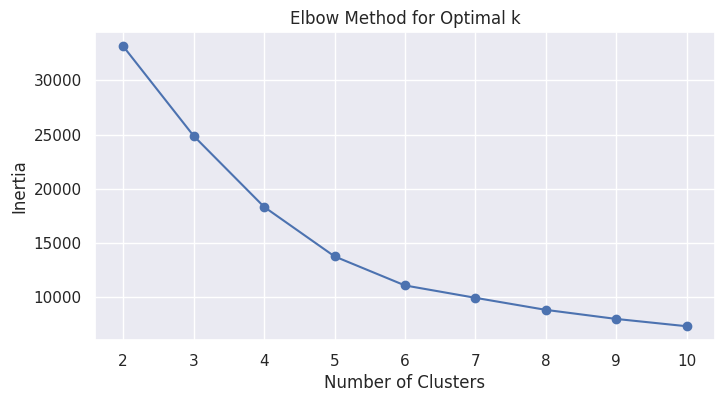

In [164]:
# dertermine clusters by Elbow-method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-165-bbc41fa1cccb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24_hrs['cluster'] = cluster_labels


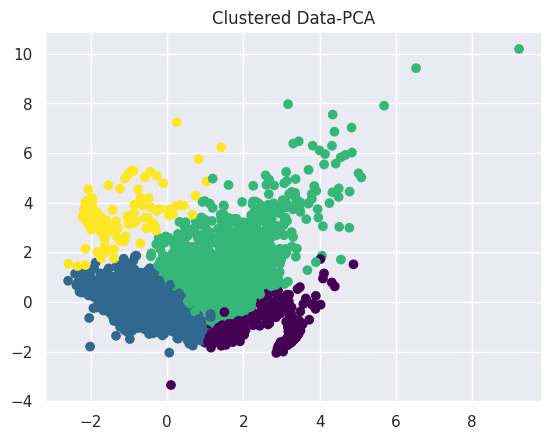

In [165]:
from sklearn.decomposition import PCA
optimal_k = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

#  add cluster labels  to  DataFrame
df_24_hrs['cluster'] = cluster_labels

# reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Visualize the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clustered Data-PCA')
plt.show()

In [166]:
# Summary of the clustering model
num_clusters=4
cluster_centers = kmeans.cluster_centers_
cluster_sizes = df_24_hrs['cluster'].value_counts()

print(f"Number of Clusters: {num_clusters}")
print("Cluster Sizes:")
print(cluster_sizes)
print("\nCluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i} Center: {center}")

Number of Clusters: 4
Cluster Sizes:
1    8451
2    2620
0    1106
3     424
Name: cluster, dtype: int64

Cluster Centers:
Cluster 0 Center: [-0.79888391 -2.61982561  1.32771086 -0.07201106]
Cluster 1 Center: [0.56851572 0.35478223 0.01851585 0.39014125]
Cluster 2 Center: [-1.38613095 -0.24268713  0.04741095 -1.11247306]
Cluster 3 Center: [-0.68691577  1.26062576 -4.12526759 -0.71760068]


In [167]:
silhouette_avg = silhouette_score(df_24_hrs[['y', 'x', 'z']], df_24_hrs['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5492459421503381


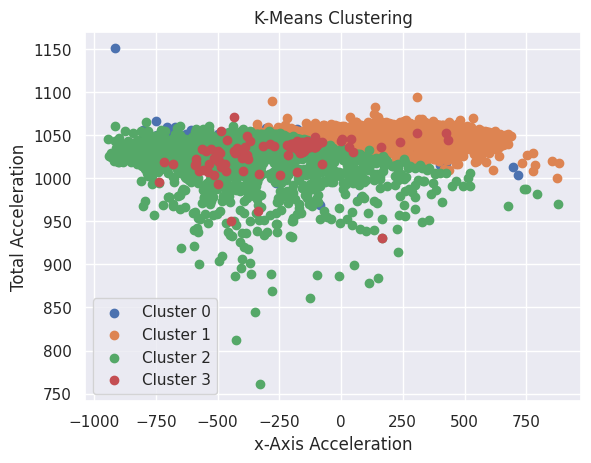

In [168]:
# Visualize the clusters (example with 2D data)
for cluster_label in range(num_clusters):
    cluster_data = df_24_hrs[df_24_hrs['cluster'] == cluster_label]
    plt.scatter(cluster_data['x'], cluster_data['Acceleration'], label=f'Cluster {cluster_label}')
plt.xlabel('x-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


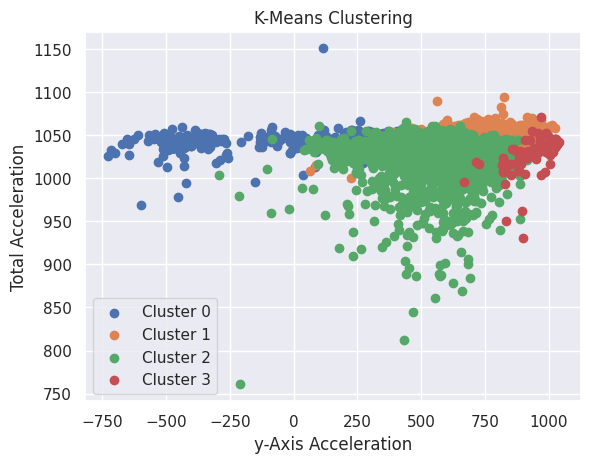

In [169]:
# Visualize the clusters (example with 2D data)
for cluster_label in range(num_clusters):
    cluster_data = df_24_hrs[df_24_hrs['cluster'] == cluster_label]
    plt.scatter(cluster_data['y'], cluster_data['Acceleration'], label=f'Cluster {cluster_label}')
plt.xlabel('y-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

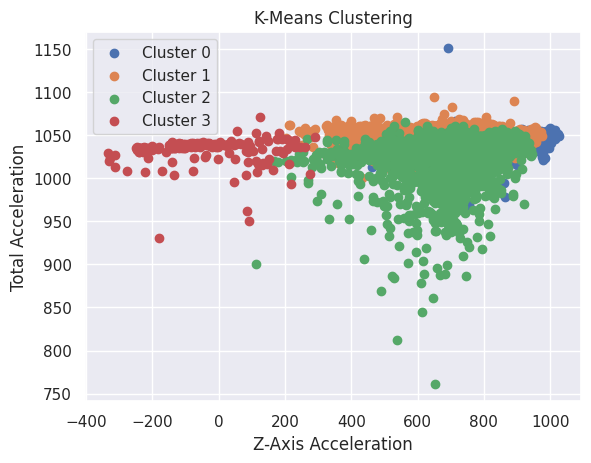

In [170]:
# Visualize the clusters (example with 2D data)
for cluster_label in range(num_clusters):
    cluster_data = df_24_hrs[df_24_hrs['cluster'] == cluster_label]
    plt.scatter(cluster_data['z'], cluster_data['Acceleration'], label=f'Cluster {cluster_label}')
plt.xlabel('Z-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [171]:
df_24_hrs.describe()

,x,y,z,Acceleration,cluster
count,12601.000000,12601.000000,12601.000000,12601.000000,12601.000000
mean,65.274308,625.472480,672.222128,1045.841615,1.187445
std,351.685881,292.478664,193.591539,16.103385,0.628633
min,-944.666667,-729.200000,-334.133333,760.545313,0.000000
25%,-172.400000,599.333333,615.866667,1042.042072,1.000000
50%,172.533333,710.266667,681.466667,1050.257221,1.000000
75%,338.666667,777.200000,769.733333,1054.441013,1.000000
max,881.333333,1039.600000,1025.866667,1151.029146,3.000000


#Finding the mean,and medians of the Features to classify the Activities.

In [172]:
cluster0_median=df_24_hrs.loc[df_24_hrs['cluster']==0,'Acceleration'].median()

In [173]:
cluster0_median

1045.1069270064554

In [174]:
cluster1_median=df_24_hrs.loc[df_24_hrs['cluster']==1,'Acceleration'].median()

In [175]:
cluster1_median

1053.0633891465766

In [176]:
cluster2_median=df_24_hrs.loc[df_24_hrs['cluster']==2,'Acceleration'].median()

In [177]:
cluster2_median

1036.3681670881979

In [178]:
cluster3_median=df_24_hrs.loc[df_24_hrs['cluster']==3,'Acceleration'].median()

In [179]:
cluster3_median

1035.6670163883691

In [180]:
df_24_hrs['Activity'] = None
df_24_hrs.loc[df_24_hrs['cluster'] == 1, 'Activity'] = 'Rumination'

<ipython-input-180-94781e6a3055>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24_hrs['Activity'] = None


In [181]:
df_24_hrs

,x,y,z,Acceleration,cluster,Activity
timestamp,,,,,,
2015-06-12 13:30:00,136.000000,610.344828,844.689655,1050.960238,1,Rumination
2015-06-12 13:30:03,-88.400000,579.066667,843.200000,1026.702978,2,None
2015-06-12 13:30:06,-684.400000,412.000000,662.000000,1037.492824,2,None
2015-06-12 13:30:09,-795.741935,343.870968,562.838710,1033.556909,2,None
2015-06-12 13:30:12,-724.933333,390.800000,621.333333,1031.653086,2,None
...,...,...,...,...,...,...
2015-06-12 23:59:48,378.266667,759.733333,631.333333,1057.762822,1,Rumination
2015-06-12 23:59:51,406.000000,762.266667,611.600000,1058.272664,1,Rumination
2015-06-12 23:59:54,418.133333,752.800000,611.466667,1056.141472,1,Rumination


In [182]:
df_24_hrs.loc[df_24_hrs['cluster'] == 0, 'Activity'] = 'Eating'

In [183]:
df_24_hrs.loc[df_24_hrs['cluster'] == 2, 'Activity'] = 'Resting'

In [184]:
df_24_hrs.loc[df_24_hrs['cluster'] == 3, 'Activity'] = 'Standing'

<Axes: >

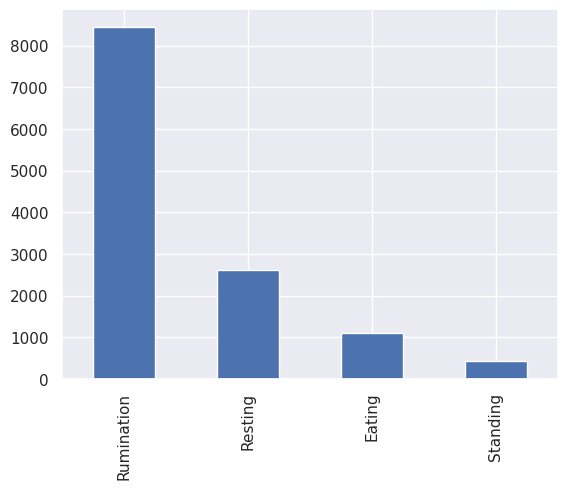

In [185]:
df_24_hrs['Activity'].value_counts().plot(kind='bar')

In [186]:
df_24_hrs

,x,y,z,Acceleration,cluster,Activity
timestamp,,,,,,
2015-06-12 13:30:00,136.000000,610.344828,844.689655,1050.960238,1,Rumination
2015-06-12 13:30:03,-88.400000,579.066667,843.200000,1026.702978,2,Resting
2015-06-12 13:30:06,-684.400000,412.000000,662.000000,1037.492824,2,Resting
2015-06-12 13:30:09,-795.741935,343.870968,562.838710,1033.556909,2,Resting
2015-06-12 13:30:12,-724.933333,390.800000,621.333333,1031.653086,2,Resting
...,...,...,...,...,...,...
2015-06-12 23:59:48,378.266667,759.733333,631.333333,1057.762822,1,Rumination
2015-06-12 23:59:51,406.000000,762.266667,611.600000,1058.272664,1,Rumination
2015-06-12 23:59:54,418.133333,752.800000,611.466667,1056.141472,1,Rumination


In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [192]:
x=df_24_hrs.drop(['cluster','Activity'],axis=1)
y=df_24_hrs['cluster']

In [190]:
x

,x,y,z,Acceleration,Activity
timestamp,,,,,
2015-06-12 13:30:00,136.000000,610.344828,844.689655,1050.960238,Rumination
2015-06-12 13:30:03,-88.400000,579.066667,843.200000,1026.702978,Resting
2015-06-12 13:30:06,-684.400000,412.000000,662.000000,1037.492824,Resting
2015-06-12 13:30:09,-795.741935,343.870968,562.838710,1033.556909,Resting
2015-06-12 13:30:12,-724.933333,390.800000,621.333333,1031.653086,Resting
...,...,...,...,...,...
2015-06-12 23:59:48,378.266667,759.733333,631.333333,1057.762822,Rumination
2015-06-12 23:59:51,406.000000,762.266667,611.600000,1058.272664,Rumination
2015-06-12 23:59:54,418.133333,752.800000,611.466667,1056.141472,Rumination


In [193]:
y

timestamp
2015-06-12 13:30:00    1
2015-06-12 13:30:03    2
2015-06-12 13:30:06    2
2015-06-12 13:30:09    2
2015-06-12 13:30:12    2
                      ..
2015-06-12 23:59:48    1
2015-06-12 23:59:51    1
2015-06-12 23:59:54    1
2015-06-12 23:59:57    1
2015-06-13 00:00:00    1
Freq: 3S, Name: cluster, Length: 12601, dtype: int32

In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [195]:
x_train

,x,y,z,Acceleration
timestamp,,,,
2015-06-12 19:16:33,-502.133333,660.933333,625.866667,1039.557521
2015-06-12 19:30:39,-426.000000,550.533333,780.400000,1045.747154
2015-06-12 21:09:51,223.466667,879.466667,539.466667,1055.662471
2015-06-12 22:34:57,209.290323,781.032258,683.612903,1058.839189
2015-06-12 21:12:12,218.064516,687.741935,772.903226,1057.317596
...,...,...,...,...
2015-06-12 23:28:12,560.645161,658.967742,598.064516,1051.780703
2015-06-12 17:49:33,243.733333,831.066667,596.800000,1051.783239
2015-06-12 17:59:30,194.533333,826.533333,620.533333,1051.694911


In [196]:
y_train

timestamp
2015-06-12 19:16:33    2
2015-06-12 19:30:39    2
2015-06-12 21:09:51    1
2015-06-12 22:34:57    1
2015-06-12 21:12:12    1
                      ..
2015-06-12 23:28:12    1
2015-06-12 17:49:33    1
2015-06-12 17:59:30    1
2015-06-12 14:13:00    1
2015-06-12 19:33:30    1
Name: cluster, Length: 10080, dtype: int32

In [197]:
x_test

,x,y,z,Acceleration
timestamp,,,,
2015-06-12 16:52:54,-144.000000,763.612903,700.774194,1046.386705
2015-06-12 14:39:57,119.225806,730.967742,746.322581,1051.439978
2015-06-12 15:11:42,320.933333,745.200000,670.133333,1052.330713
2015-06-12 16:26:24,321.866667,714.133333,704.933333,1053.810027
2015-06-12 19:39:09,-489.866667,511.333333,763.866667,1041.596569
...,...,...,...,...
2015-06-12 20:12:51,237.466667,722.666667,736.800000,1059.014527
2015-06-12 23:38:09,-233.200000,254.400000,993.066667,1051.324405
2015-06-12 15:15:24,257.333333,730.000000,710.800000,1050.883954


In [198]:
y_test

timestamp
2015-06-12 16:52:54    1
2015-06-12 14:39:57    1
2015-06-12 15:11:42    1
2015-06-12 16:26:24    1
2015-06-12 19:39:09    2
                      ..
2015-06-12 20:12:51    1
2015-06-12 23:38:09    0
2015-06-12 15:15:24    1
2015-06-12 16:55:00    2
2015-06-12 23:55:45    1
Name: cluster, Length: 2521, dtype: int32

In [199]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [201]:
y_pred=rf.predict(x_test)

In [202]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9948433161443871


In [206]:
rtrain_yhat=rf.predict(x_train)
train_acc=accuracy_score(y_train,rtrain_yhat)

print("Train Accuracy:",train_acc)
print("Test Accuaracy",accuracy)

Train Accuracy: 1.0
Test Accuaracy 0.9948433161443871


In [207]:
param_dist={'n_estimators':randint(50,500),
            'max_depth':randint(1,20)}


rf=RandomForestClassifier()
rand_search=RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=5,cv=5)
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebe0ed28040>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebe0ed2a0e0>})

In [208]:
best_rf=rand_search.best_estimator_
print("Best hyperparameters:",rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 211}


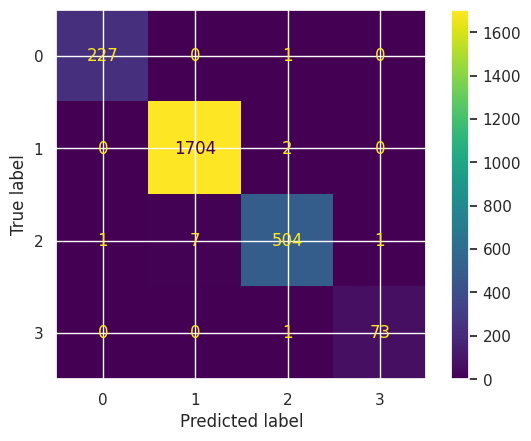

In [209]:
Y_pred=best_rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [210]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Assuming you have a single output neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on test data
loss = model.evaluate(x_test_scaled, y_test)
print("Test Loss:", loss)


Epoch 1/50
252/252 - 2s - loss: 0.1182 - val_loss: 0.0433 - 2s/epoch - 8ms/step
Epoch 2/50
252/252 - 1s - loss: 0.0382 - val_loss: 0.0307 - 582ms/epoch - 2ms/step
Epoch 3/50
252/252 - 1s - loss: 0.0293 - val_loss: 0.0253 - 569ms/epoch - 2ms/step
Epoch 4/50
252/252 - 1s - loss: 0.0233 - val_loss: 0.0218 - 587ms/epoch - 2ms/step
Epoch 5/50
252/252 - 1s - loss: 0.0203 - val_loss: 0.0193 - 586ms/epoch - 2ms/step
Epoch 6/50
252/252 - 0s - loss: 0.0177 - val_loss: 0.0181 - 485ms/epoch - 2ms/step
Epoch 7/50
252/252 - 1s - loss: 0.0172 - val_loss: 0.0160 - 535ms/epoch - 2ms/step
Epoch 8/50
252/252 - 1s - loss: 0.0158 - val_loss: 0.0160 - 575ms/epoch - 2ms/step
Epoch 9/50
252/252 - 1s - loss: 0.0148 - val_loss: 0.0145 - 550ms/epoch - 2ms/step
Epoch 10/50
252/252 - 0s - loss: 0.0138 - val_loss: 0.0138 - 489ms/epoch - 2ms/step
Epoch 11/50
252/252 - 1s - loss: 0.0126 - val_loss: 0.0168 - 507ms/epoch - 2ms/step
Epoch 12/50
252/252 - 1s - loss: 0.0124 - val_loss: 0.0128 - 504ms/epoch - 2ms/step
Epoc

In [211]:
from sklearn.metrics import r2_score

# Predict the values for test set
y_pred = model.predict(x_test_scaled)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

79/79 [==============================] - 0s 2ms/step
R^2 Score: 0.9832634229652716
